In [2]:
import pandas as pd
from utils import import_df
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from utils import export_df

df = import_df("2-data-generation-output.json")
df_base = df.copy()
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_vel,vib_z_acc,vib_z_f1,vib_z_f2,vib_z_f3,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
3050,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,2.844896,1.684042,1.109990,2.106870,0.603318,0.362336,0.576215,2.100146,3.967956,working-engine-1
3051,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,2.838546,1.700080,4.016145,6.259542,4.072398,0.352717,0.611753,2.122022,3.950103,working-engine-1
3052,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,2.835371,1.668003,7.346115,10.625954,4.796380,0.353037,0.573677,2.068546,3.950103,working-engine-1
3053,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,2.863947,1.684042,5.206862,7.816794,4.404223,0.358809,0.581292,2.100146,3.960632,working-engine-1
3056,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,2.848071,1.684042,4.278507,6.473282,3.469080,0.353679,0.596522,2.102577,3.961089,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24387,0.117213,-0.862416,0.121430,-0.251412,0.460662,0.298635,0.257918,-0.307911,-0.360434,-0.153353,...,1.904471,1.017857,1.000000,1.000000,1.000000,1.044533,1.012060,1.068273,3.955596,magnet-1
24388,0.298033,-1.253810,-0.661358,-0.743516,0.405729,0.834227,0.328872,-0.614617,-0.470299,-0.640879,...,1.855294,0.942460,1.000000,1.000000,1.000000,1.035951,0.868844,0.839357,3.950561,magnet-1
24389,0.265989,-0.500777,-0.182988,-0.475720,0.023491,0.944092,0.580646,0.033128,-1.392707,0.217441,...,1.828471,0.980159,1.000000,1.000000,1.000000,1.038475,1.040704,1.098795,3.948730,magnet-1
24390,0.588717,-0.388623,0.677621,-0.342967,0.291287,-0.046982,0.688222,-0.101914,-0.271169,-0.199130,...,2.011765,0.942460,1.000000,1.000000,1.000000,0.978903,0.887940,1.236145,3.959258,magnet-1


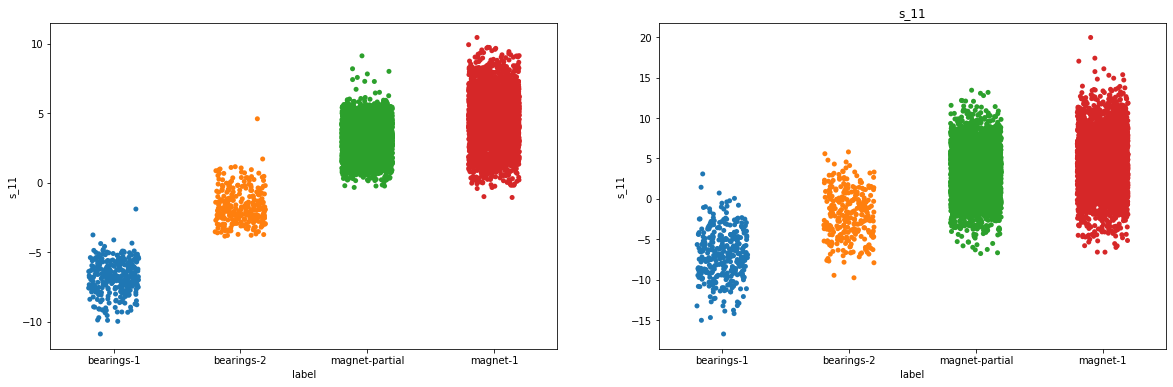

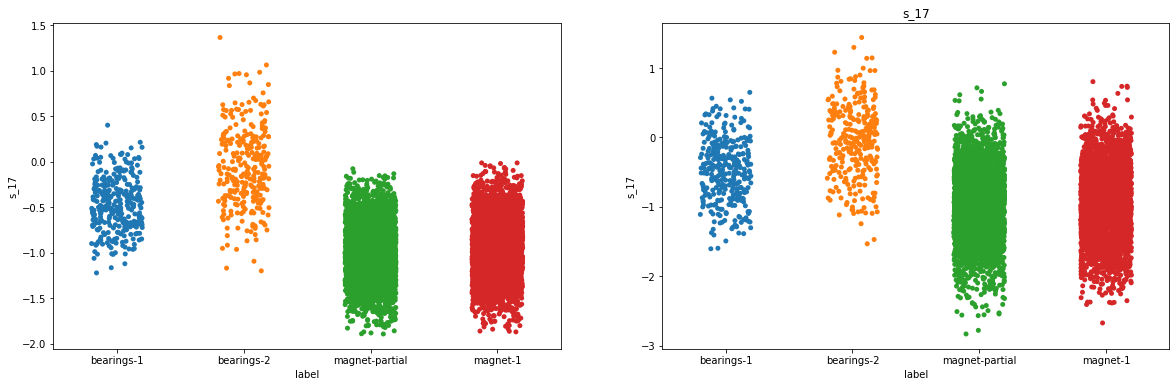

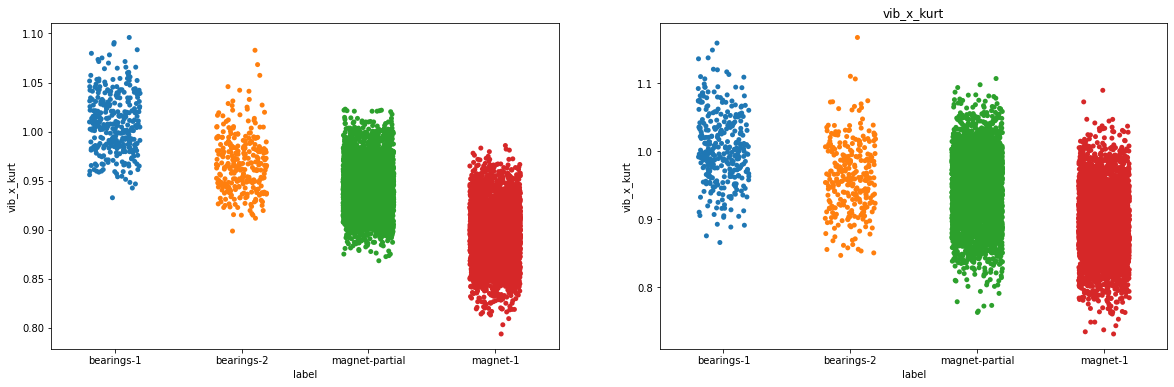

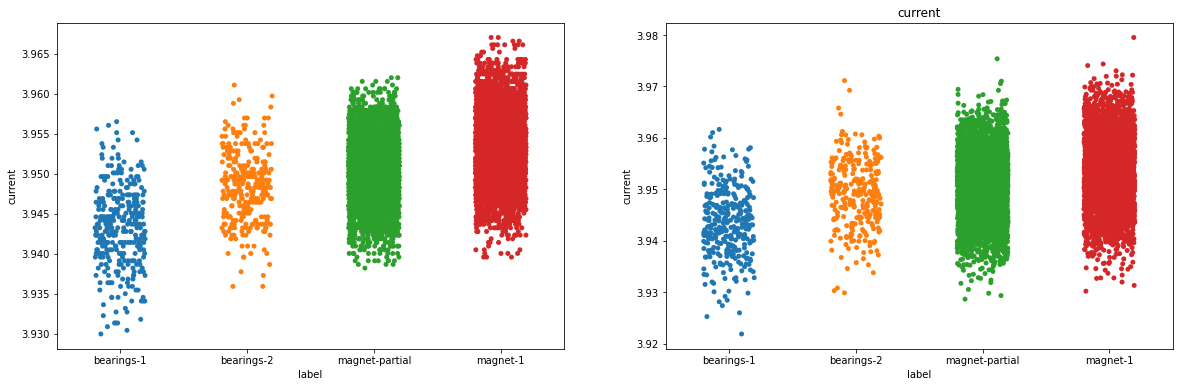

In [3]:
c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]
df = df[df.label.isin(['bearings-1', 'bearings-2', 'magnet-partial', 'magnet-1'])]
df = df.drop("label", axis=1)

for col in df.columns:
    std = statistics.stdev(df[col])
    noise = np.random.normal(0, std, len(df))
    df[col] += noise
    
df["label"] = df_base.label

# for col in df.columns[1:-1]:
for col in 's_11', 's_17', 'vib_x_kurt', 'current': # df.columns[1:-1]
    fig, (ax1, ax2) = plt.subplots(1,2)
    sns.stripplot(x="label", y=col, data=df_base, jitter=0.2, c=c, order=df.label.unique(), ax=ax1)
    sns.stripplot(x="label", y=col, data=df, jitter=0.2, c=c, order=df.label.unique(), ax=ax2)
    fig.set_size_inches(20, 6)
    plt.title(col)
    plt.show()

In [6]:
export_df(df, "3-noise-generation-output.json")